# Proyek Analisis Data: Bike Sharing Dataset



- **Nama:** Sitti Saenab
- **Email:** sittisaenab046@gmail.com
- **ID Dicoding:** sitti_saenab_PBD7

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
- Pertanyaan 2

1. Kapan peminjaman sepeda paling banyak dalam seminggu?
2. Pada jam berapa sepeda paling sering dipinjam dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [66]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [67]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Memuat dataset day.csv dan hour.csv
- Fungsi .head() pada DataFrame digunakan untuk menampilkan lima baris pertama dari dataset, sehingga kita bisa melihat struktur data, jenis kolom, dan beberapa contoh nilai awal.
- Dari hasilnya, kita bisa memahami bahwa dataset day.csv berisi informasi peminjaman sepeda berdasarkan hari, dengan kolom seperti dteday, season, weekday, weathersit, serta cnt.
- Untuk dataset hour.csv memiliki format yang mirip tetapi dengan tingkat detail per jam (hr). Yang memungkinkan kita untuk melihat pola penggunaan sepeda secara lebih spesifik, misalnya jam-jam sibuk peminjaman sepeda.

### Assessing Data

In [68]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [69]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [70]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [71]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [72]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [73]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [74]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [75]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- day_df berisi data harian dengan 731 baris dan 16 kolom, sedangkan hour_df berisi data per jam dengan 17.379 baris dan 17 kolom.
- Dari dataset day_df maupun hour_df tidak memiliki nilai yang hilang atau missing value dan kedua dataset tersebut tidak terdapat duplikasi dapat dilihat pada hasil di atas, Jumlah duplikasi:  0
- Pada day_df dan hour_df, kolom dteday bertipe data object, yang seharusnya menjadi tipe data datetime.

### Cleaning Data

In [76]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [77]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [78]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [79]:
hour_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [80]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [81]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
-  Sebelum pembersihan data, type data kolom dteday pada kedua dataframe (day_df dan hour_df) masih berupa objek string. Setelah pembersihan, kolom tersebut dikonversi menjadi format tanggal menggunakan fungsi pd.to_datetime().
- Proses cleaning data yang dilakukan membuat dataset siap untuk analisis selanjutnya. Dengan memastikan tipe data yang tepat, tidak ada data yang hilang, dan data waktu diubah dengan benar, kita bisa mendapatkan hasil analisis yang lebih tepat

## Exploratory Data Analysis (EDA)

### Explore ...

In [82]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [83]:
day_df.groupby(by="weekday").agg({
    "cnt": "sum",
    "temp": ["max", "min", "mean", "std"],
})

cnt      temp                              
            sum       max       min      mean       std
weekday                                                
0        444027  0.830000  0.096522  0.483628  0.186171
1        455503  0.781667  0.097391  0.493449  0.182704
2        469109  0.818333  0.150000  0.504282  0.179632
3        473048  0.793333  0.107500  0.504626  0.181188
4        485395  0.827500  0.144348  0.504342  0.183784
5        487790  0.848333  0.160870  0.495589  0.184419
6        477807  0.861667  0.059130  0.482038  0.187040

In [84]:
day_df.groupby(by="weekday").cnt.sum().sort_values(ascending=False)

,cnt
weekday,
5,487790
4,485395
6,477807
3,473048
2,469109
1,455503
0,444027


In [85]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,731,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-01 00:00:00,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [86]:
hour_df.groupby(by="hr").agg({
    "cnt": "sum",
    "temp": ["max", "min", "mean", "std"],
})

cnt  temp                          
       sum   max   min      mean       std
hr                                        
0    39130  0.82  0.04  0.467410  0.176550
1    24164  0.82  0.04  0.459365  0.176498
2    16352  0.82  0.02  0.454573  0.174807
3     8174  0.80  0.02  0.453113  0.172499
4     4428  0.78  0.02  0.446628  0.171371
5    14261  0.78  0.02  0.436123  0.173457
6    55132  0.80  0.02  0.432469  0.176661
7   154171  0.80  0.02  0.439092  0.184456
8   261001  0.84  0.02  0.454993  0.191244
9   159438  0.86  0.04  0.476726  0.194848
10  126257  0.92  0.04  0.500578  0.198130
11  151320  0.94  0.06  0.522613  0.197818
12  184414  0.96  0.06  0.540275  0.199211
13  184919  0.96  0.08  0.554733  0.198297
14  175652  0.96  0.10  0.565075  0.198187
15  183149  0.96  0.12  0.568615  0.197608
16  227748  1.00  0.12  0.564959  0.196834
17  336860  0.98  0.12  0.554575  0.197380
18  309772  0.96  0.08  0.541181  0.195319
19  226789  0.92  0.08  0.524176  0.188999
20  164550  0.92  0.06  0.508599  0.185639
21  125445  0.88  0.06  0.495302  0.182269
22   95612  0.84  0.06  0.484505  0.180696
23   63941  0.84  0.04  0.475027  0.178362

In [87]:
hour_df.groupby(by="hr").cnt.sum().sort_values(ascending=False)

,cnt
hr,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


**Insight:**
- Dari hasil pengelompokkan berdasarkan hari dalam seminggu (weekday), dapat dilihat bahwa hari Sabtu (weekday 5) memiliki jumlah total sewa sepeda (cnt) tertinggi, kemudian diikuti oleh hari Jumat (weekday 4) dan Minggu (weekday 6). Hal ini menunjukkan bahwa orang lebih sering menyewa sepeda di akhir pekan.
- Sedangkan pada Hari Senin (weekday 0) menunjukkan hasil jumlah sewa sepeda terendah, mungkin karena rutinitas kerja yang lebih padat.
- Dari hasil analisis pengelompokkan berdasarkan jam (hr), dapat dilihat bahwa jam dengan jumlah sewa sepeda tertinggi adalah pada pukul 17:00 (336,860 sewa), kemudian diikuti oleh pukul 18:00 (309,772 sewa), dan pukul 8:00 (261,001 sewa). Hal ini menunjukkan adanya pola penggunaan sepeda yang meningkat pada jam-jam tertentu, terutama pada sore hari dimana orang-orang pulang kerja atau libur, dan pagi hari saat orang menuju ke tempat kerja atau aktivitas lainnya.
-Sedangkan penggunaan sepeda di malam hari (pukul 23:00 hingga 4:00 pagi) sangat rendah, dengan jumlah sewa paling rendah tercatat pada pukul 4:00 pagi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan peminjaman sepeda paling banyak dalam seminggu?

<ipython-input-88-1abdae85e1b0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_bike_rentals.index, y=daily_bike_rentals.values, palette='Blues_d')


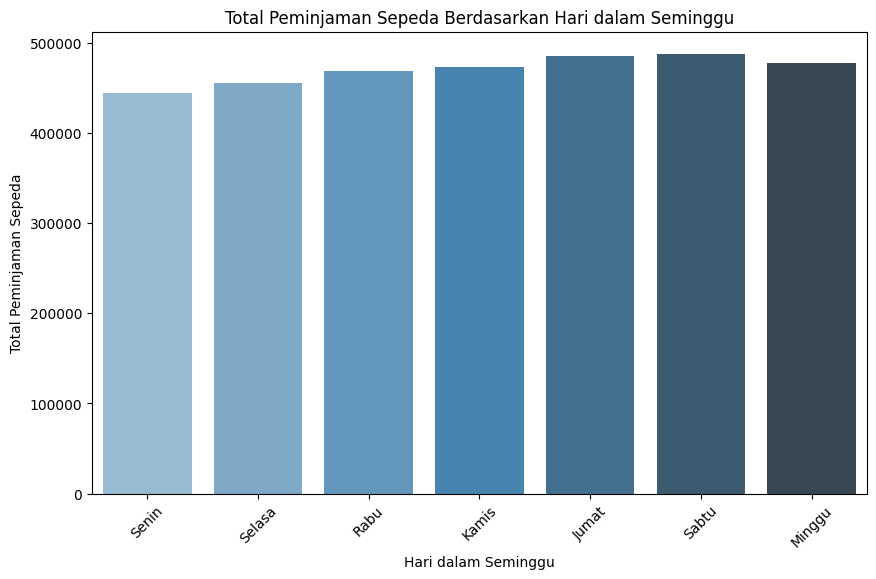

In [88]:
# Menghitung total peminjaman sepeda per hari dalam seminggu
daily_bike_rentals = day_df.groupby('weekday')['cnt'].sum()

# Visualisasi peminjaman sepeda per hari
plt.figure(figsize=(10,6))
sns.barplot(x=daily_bike_rentals.index, y=daily_bike_rentals.values, palette='Blues_d')
plt.title('Total Peminjaman Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Total Peminjaman Sepeda')
plt.xticks(ticks=range(7), labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'], rotation=45)
plt.show()


### Pertanyaan 2: Pada jam berapa sepeda paling sering dipinjam dalam sehari?

<ipython-input-89-c0a802493c4d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_bike_rentals.index, y=hourly_bike_rentals.values, palette='viridis')


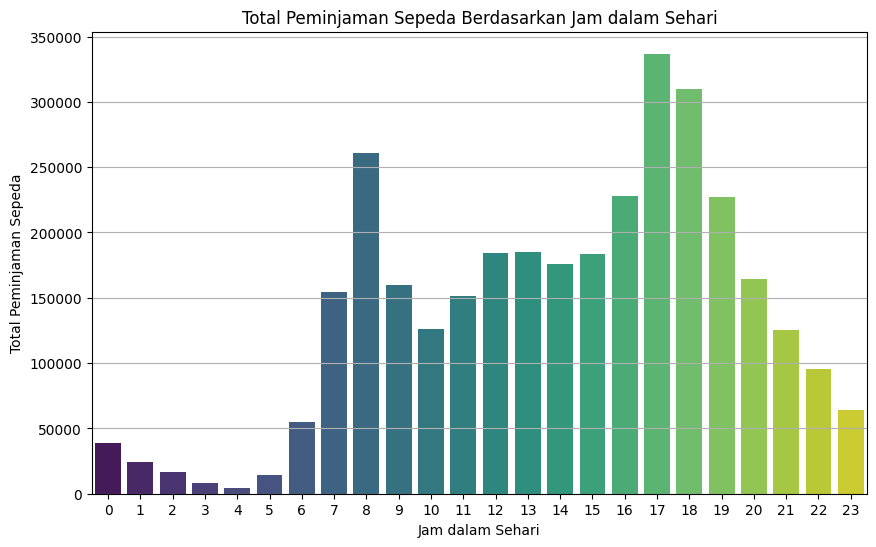

In [89]:
# Menghitung total peminjaman sepeda per jam
hourly_bike_rentals = hour_df.groupby('hr')['cnt'].sum()

# Visualisasi peminjaman sepeda per jam
plt.figure(figsize=(10,6))
sns.barplot(x=hourly_bike_rentals.index, y=hourly_bike_rentals.values, palette='viridis')
plt.title('Total Peminjaman Sepeda Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Total Peminjaman Sepeda')
plt.xticks(ticks=range(0, 24, 1))
plt.grid(True, axis='y')
plt.show()


**Insight:**
- Berdasarkan visualisasi diatas peminjaman sepeda berdasarkan hari dalam seminggu, kita bisa melihat bahwa peminjaman sepeda paling banyak adalah pada hari Sabtu.
- Berdasarkan visualisasi peminjaman sepeda per jam dalam sehari, kita bisa melihat bahwa puncak peminjaman sepeda yaitu pada jam 17:00 (5 sore) dan 18:00 (6 sore).

## Analisis Lanjutan (Opsional)

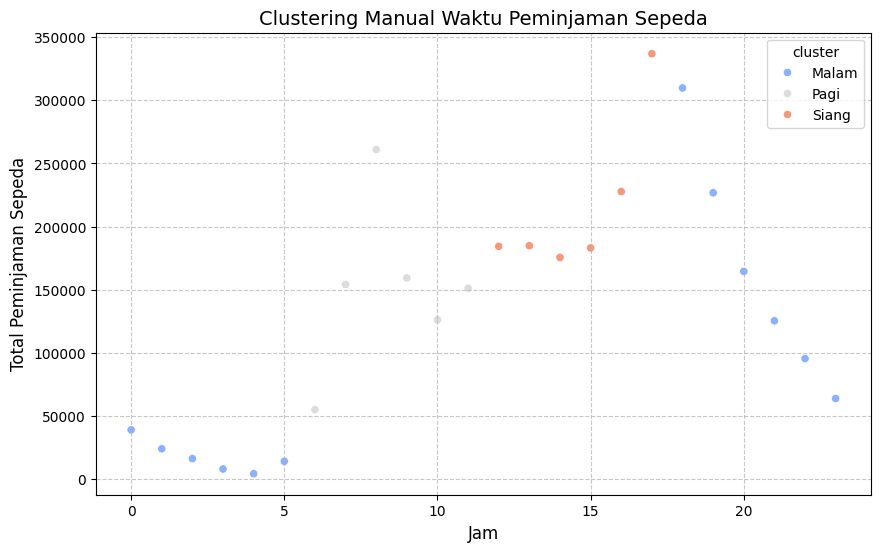

In [90]:
# Ambil data jumlah penyewaan per jam
hourly_rentals = hour_df.groupby('hr')['cnt'].sum().reset_index()

# Manual grouping berdasarkan aturan waktu
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 18:
        return 'Siang'
    else:
        return 'Malam'

hourly_rentals['cluster'] = hourly_rentals['hr'].apply(categorize_time)

# Visualisasi cluster manual
plt.figure(figsize=(10,6))
sns.scatterplot(x=hourly_rentals['hr'], y=hourly_rentals['cnt'], hue=hourly_rentals['cluster'], palette='coolwarm')
plt.title('Clustering Manual Waktu Peminjaman Sepeda', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Total Peminjaman Sepeda', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Insight:**

- Dari gambar diatas bisa dilihat bahwa sore hari (17:00 - 18:00) adalah waktu paling sibuk untuk peminjaman sepeda.
- Pada pagi hari (06:00 - 11:00) memiliki aktivitas yang stabil, terutama sekitar jam 08:00.
- Sedangkan peminjaman cenderung rendah setelah jam 19:00, terutama tengah malam.

## Conclusion

- Conclution pertanyaan 1

  Berdasarkan data peminjaman sepeda per hari dalam seminggu, terlihat bahwa peminjaman sepeda paling banyak adalah pada hari Sabtu, Jumat, dan Minggu. Hal ini menunjukkan bahwa orang lebih sering menyewa sepeda di akhir pekan. Sedangkan pada hari Senin, merupakan jumlah peminjaman sepeda paling rendah, yang kemungkinan karena orang lebih fokus pada rutinitas kerja atau aktivitas mingguan yang lebih padat.

- Conclution pertanyaan 2

  Dari data peminjaman sepeda per jam, dapat disimpulkan bahwa waktu peminjaman sepeda paling tinggi yaitu pada jam 17:00 (5 sore) dan 18:00 (6 sore). Ini menunjukkan bahwa banyak orang meminjam sepeda di sore hari. Selain itu, peminjaman sepeda juga cukup tinggi di pagi hari antara jam 8:00 hingga 12:00, kemungkinan untuk keperluan transportasi menuju tempat kerja atau sekolah. Setelah jam 20:00, jumlah peminjaman sepeda menurun, hal ini menunjukkan bahwa aktivitas luar ruangan berkurang di malam hari.